,Google Trends
2004-01-01,2
2004-02-01,2
2004-03-01,3
2004-04-01,2
2004-05-01,3
...,...
2021-11-01,78
2021-12-01,77
2022-01-01,83
2022-02-01,85


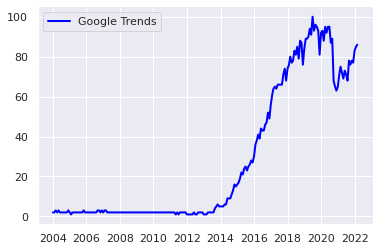

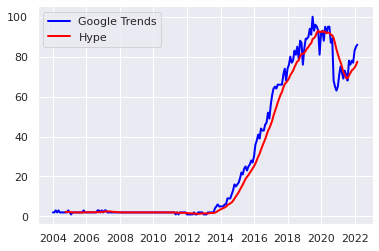

In [22]:
import pandas 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.dates as mdates
import numpy as np

sns.set_theme() 
custom_params = {"axes.spines.right": False, "axes.spines.top": False} 
sns.set_theme(style="darkgrid", rc=custom_params)

df_orig = pandas.read_csv('/tmp/google_trend_data.csv', skiprows=2)
df_orig.replace('<1', 0, inplace = True)
df_orig.rename(columns={df_orig.columns[1] : "Google Trends"}, inplace=True)
df = df_orig.astype({'Google Trends': 'int32'})


df.set_index('Month', inplace = True)
df.index = pandas.to_datetime(df.index).date

display(df)

ax = df.plot(color=['#0000FF', '#FF0000'], lw=2)

df_2 = df.rolling(10).mean()
df_2.rename(columns={"Google Trends" : "Hype"}, inplace=True)

df_all = pandas.concat([df, df_2], axis=1)
g = df_all.plot(color=['#0000FF', '#FF0000'], lw=2)
g.figure.savefig('/tmp/graph.svg', format='svg', dpi=1200)